# **Cleaning Flats Data**  


- ## Pre-processing steps for merging datasets

 1. **Load the flats dataset**


 2. **Clean the flats dataset**


 3. Load the houses dataset


 4. Clean the houses dataset


 5. Merge the cleaned datasets


 6. Perform a second round of cleaning on the merged dataset


 7. Save the cleaned dataset
---

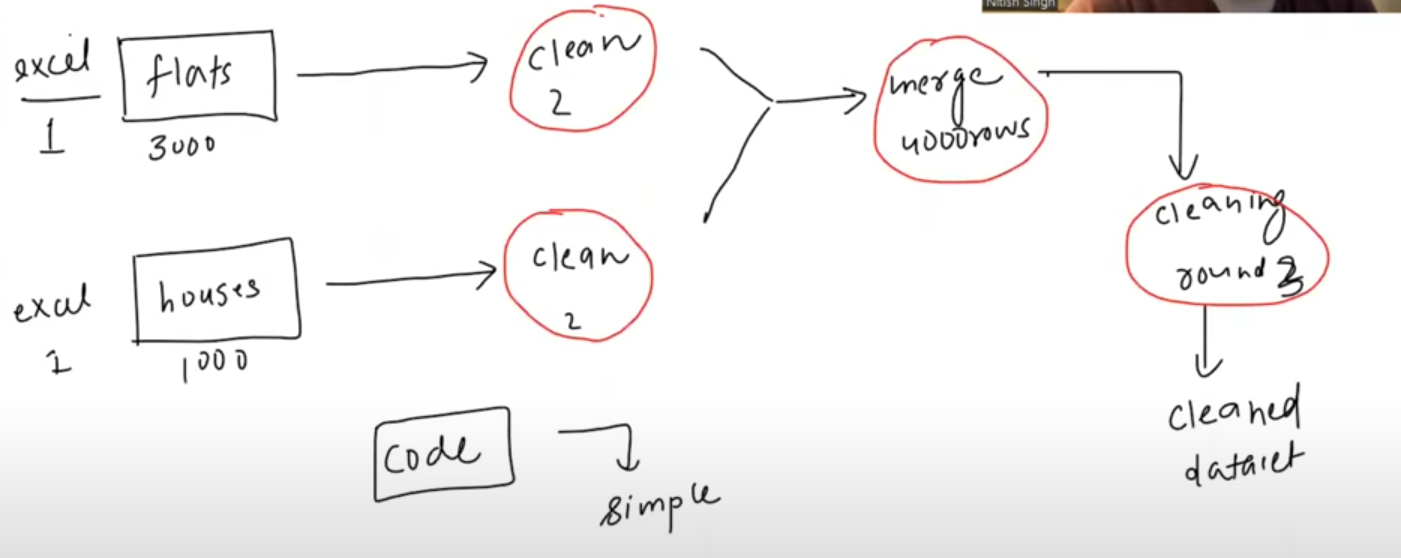

---





In [671]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

---
## Load data

In [672]:
input_file = '../data/scrap-data/flats.csv'
outut_file = '../data/clean-data/flats.csv'
df = pd.read_csv('../data/scrap-data/flats.csv')
df.sample(5)

property_name  \
34    3 BHK Flat in Sector 92 Gurgaon   
2295              2 BHK Flat in Sohna   
76                2 BHK Flat in Sohna   
1459  3 BHK Flat in Sector 67 Gurgaon   
163               2 BHK Flat in Sohna   

                                                   link  \
34    https://www.99acres.com/3-bhk-bedroom-apartmen...   
2295  https://www.99acres.com/2-bhk-bedroom-apartmen...   
76    https://www.99acres.com/2-bhk-bedroom-apartmen...   
1459  https://www.99acres.com/3-bhk-bedroom-apartmen...   
163   https://www.99acres.com/2-bhk-bedroom-apartmen...   

                        society    price             area  \
34              Sare Green Parc   85 Lac   ₹ 6,538/sq.ft.   
2295  Breez Global Heights4.2 ★   46 Lac   ₹ 6,478/sq.ft.   
76       GLS Arawali Homes3.8 ★   30 Lac   ₹ 4,687/sq.ft.   
1459            M3M Merlin3.7 ★  3 Crore  ₹ 14,655/sq.ft.   
163          Ashiana Anmol3.5 ★   90 Lac   ₹ 9,463/sq.ft.   

                                           areaWithType     bedRoom  \
34                   Built Up area: 1300 (120.77 sq.m.)  3 Bedrooms   
2295                     Carpet area: 710 (65.96 sq.m.)  2 Bedrooms   
76                       Carpet area: 640 (59.46 sq.m.)  2 Bedrooms   
1459  Super Built up area 2047(190.17 sq.m.)Built Up...  3 Bedrooms   
163   Super Built up area 1275(118.45 sq.m.)Carpet a...  2 Bedrooms   

         bathroom       balcony additionalRoom  \
34    2 Bathrooms   2 Balconies            NaN   
2295  2 Bathrooms   2 Balconies            NaN   
76    2 Bathrooms   2 Balconies            NaN   
1459  3 Bathrooms  3+ Balconies     Store Room   
163   2 Bathrooms   2 Balconies            NaN   

                                             address             floorNum  \
34    Sector 92, Sector 92 Gurgaon, Gurgaon, Haryana  20th   of 20 Floors   
2295                    606, Sohna, Gurgaon, Haryana   6th   of 10 Floors   
76                           Sohna, Gurgaon, Haryana   4th   of 13 Floors   
1459       4040, Sector 67 Gurgaon, Gurgaon, Haryana   4th   of 21 Floors   
163                          Sohna, Gurgaon, Haryana  13rd   of 14 Floors   

          facing    agePossession  \
34           NaN        undefined   
2295        East  1 to 5 Year Old   
76           NaN  1 to 5 Year Old   
1459  North-East  1 to 5 Year Old   
163        South  1 to 5 Year Old   

                                        nearbyLocations  \
34    ['Huda city centre metro station', 'Iffco chow...   
2295  ['Raheja Mall', 'Golf Course Extension Road', ...   
76    ['Huda City Centre', 'Golf Course Road', 'Delh...   
1459  ['Airia Mall', 'Golf Course Extension Road', '...   
163   ['Global Signum Plaza', 'Airia Mall', 'Sohna R...   

                                            description  \
34    Best in class property available at sector 92 ...   
2295  Unit is fully functional and loaded with some ...   
76    Residential apartment for sell.Located in sohn...   
1459  This beautiful 3 bhk flat in sector 67 gurgaon...   
163   South facing flat with sun whole winters and c...   

                                         furnishDetails  \
34                                                  NaN   
2295  ['1 Water Purifier', '3 Fan', '1 Fridge', '1 E...   
76    ['1 Bed', '1 Fan', '1 Geyser', '1 Light', '1 A...   
1459  ['3 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Ge...   
163   ['1 Water Purifier', '4 Fan', '1 Exhaust Fan',...   

                                               features  \
34                                                  NaN   
2295  ['Feng Shui / Vaastu Compliant', 'Security / F...   
76    ['Feng Shui / Vaastu Compliant', 'Intercom Fac...   
1459  ['Centrally Air Conditioned', 'Water purifier'...   
163   ['Security / Fire Alarm', 'Feng Shui / Vaastu ...   

                                                 rating property_id  
34    ['Environment5 out of 5', 'Safety3 out of 5', ...   Y68788154  
2295  ['Green Area5 out of 5', 'Construction5 out of...   H69560214  
76    ['Gre

In [673]:
# shape
df.shape

(3017, 20)

In [674]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    3017 non-null   object
 1   link             3017 non-null   object
 2   society          3016 non-null   object
 3   price            3007 non-null   object
 4   area             3004 non-null   object
 5   areaWithType     3008 non-null   object
 6   bedRoom          3008 non-null   object
 7   bathroom         3008 non-null   object
 8   balcony          3008 non-null   object
 9   additionalRoom   1694 non-null   object
 10  address          3002 non-null   object
 11  floorNum         3006 non-null   object
 12  facing           2127 non-null   object
 13  agePossession    3007 non-null   object
 14  nearbyLocations  2913 non-null   object
 15  description      3008 non-null   object
 16  furnishDetails   2203 non-null   object
 17  features         2594 non-null   

In [675]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

In [676]:
# check for missing values
df.isnull().sum()

property_name         0
link                  0
society               1
price                10
area                 13
areaWithType          9
bedRoom               9
bathroom              9
balcony               9
additionalRoom     1323
address              15
floorNum             11
facing              890
agePossession        10
nearbyLocations     104
description           9
furnishDetails      814
features            423
rating              341
property_id           9
dtype: int64

In [677]:
# Columns to drop -> property_name, link, property_id
df.drop(columns=['link','property_id'], inplace=True)
df.head()

property_name                 society       price  \
0     2 BHK Flat in Krishna Colony  maa bhagwati residency      45 Lac   
1        2 BHK Flat in Ashok Vihar            Apna Enclave      50 Lac   
2              2 BHK Flat in Sohna  Tulsiani Easy in Homes      40 Lac   
3  2 BHK Flat in Sector 61 Gurgaon     Smart World Orchard  1.47 Crore   
4  2 BHK Flat in Sector 92 Gurgaon        Parkwood Westend      70 Lac   

              area                            areaWithType     bedRoom  \
0   ₹ 5,000/sq.ft.          Carpet area: 900 (83.61 sq.m.)  2 Bedrooms   
1   ₹ 7,692/sq.ft.          Carpet area: 650 (60.39 sq.m.)  2 Bedrooms   
2   ₹ 6,722/sq.ft.          Carpet area: 595 (55.28 sq.m.)  2 Bedrooms   
3  ₹ 12,250/sq.ft.        Carpet area: 1200 (111.48 sq.m.)  2 Bedrooms   
4   ₹ 5,204/sq.ft.  Super Built up area 1345(124.95 sq.m.)  2 Bedrooms   

      bathroom      balcony additionalRoom  \
0  2 Bathrooms    1 Balcony            NaN   
1  2 Bathrooms    1 Balcony            NaN   
2  2 Bathrooms  3 Balconies            NaN   
3  2 Bathrooms  2 Balconies     Study Room   
4  2 Bathrooms  3 Balconies     Study Room   

                               address             floorNum facing  \
0     Krishna Colony, Gurgaon, Haryana    4th   of 4 Floors   West   
1   46b, Ashok Vihar, Gurgaon, Haryana    1st   of 3 Floors   West   
2              Sohna, Gurgaon, Haryana  12nd   of 14 Floors    NaN   
3  Sector 61 Gurgaon, Gurgaon, Haryana    2nd   of 4 Floors    NaN   
4  Sector 92 Gurgaon, Gurgaon, Haryana    5th   of 8 Floors    NaN   

        agePossession                                    nearbyLocations  \
0     1 to 5 Year Old  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1        10+ Year Old  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2     0 to 1 Year Old  ['Huda City Metro', 'Golf Course extn road', '...   
3            Dec 2023  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  Under Construction  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                         description  \
0  So with lift.Maa bhagwati residency is one of ...   
1  Property situated on main road, railway statio...   
2  This property is 15 km away from badshapur, gu...   
3  Near to metro station of sector 56 and opposit...   
4  We are the proud owners of this 2 bhk alongwit...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   
1  ['Security / Fire Alarm', 'Maintenance Staff',...   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
3  ['Security / Fire Alarm', 'Private Garden / Te...   
4                                                NaN   

                                              rating  
0  ['Environment4 out of 5', 'Safety4 out of 5', ...  
1  ['Environment4 out of 5', 'Safety4 out of 5', ...  
2  ['Environment4 out of 5', 'Safety4 out of 5', ...  
3                                                NaN  
4  ['Environment5 out of 5', 'Safety3 out of 5', ...

In [678]:
# rename columns
df.rename(columns={'area':'price_per_sqft'},inplace=True)
df.head()

property_name                 society       price  \
0     2 BHK Flat in Krishna Colony  maa bhagwati residency      45 Lac   
1        2 BHK Flat in Ashok Vihar            Apna Enclave      50 Lac   
2              2 BHK Flat in Sohna  Tulsiani Easy in Homes      40 Lac   
3  2 BHK Flat in Sector 61 Gurgaon     Smart World Orchard  1.47 Crore   
4  2 BHK Flat in Sector 92 Gurgaon        Parkwood Westend      70 Lac   

    price_per_sqft                            areaWithType     bedRoom  \
0   ₹ 5,000/sq.ft.          Carpet area: 900 (83.61 sq.m.)  2 Bedrooms   
1   ₹ 7,692/sq.ft.          Carpet area: 650 (60.39 sq.m.)  2 Bedrooms   
2   ₹ 6,722/sq.ft.          Carpet area: 595 (55.28 sq.m.)  2 Bedrooms   
3  ₹ 12,250/sq.ft.        Carpet area: 1200 (111.48 sq.m.)  2 Bedrooms   
4   ₹ 5,204/sq.ft.  Super Built up area 1345(124.95 sq.m.)  2 Bedrooms   

      bathroom      balcony additionalRoom  \
0  2 Bathrooms    1 Balcony            NaN   
1  2 Bathrooms    1 Balcony            NaN   
2  2 Bathrooms  3 Balconies            NaN   
3  2 Bathrooms  2 Balconies     Study Room   
4  2 Bathrooms  3 Balconies     Study Room   

                               address             floorNum facing  \
0     Krishna Colony, Gurgaon, Haryana    4th   of 4 Floors   West   
1   46b, Ashok Vihar, Gurgaon, Haryana    1st   of 3 Floors   West   
2              Sohna, Gurgaon, Haryana  12nd   of 14 Floors    NaN   
3  Sector 61 Gurgaon, Gurgaon, Haryana    2nd   of 4 Floors    NaN   
4  Sector 92 Gurgaon, Gurgaon, Haryana    5th   of 8 Floors    NaN   

        agePossession                                    nearbyLocations  \
0     1 to 5 Year Old  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1        10+ Year Old  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2     0 to 1 Year Old  ['Huda City Metro', 'Golf Course extn road', '...   
3            Dec 2023  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  Under Construction  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                         description  \
0  So with lift.Maa bhagwati residency is one of ...   
1  Property situated on main road, railway statio...   
2  This property is 15 km away from badshapur, gu...   
3  Near to metro station of sector 56 and opposit...   
4  We are the proud owners of this 2 bhk alongwit...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   
1  ['Security / Fire Alarm', 'Maintenance Staff',...   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
3  ['Security / Fire Alarm', 'Private Garden / Te...   
4                                                NaN   

                                              rating  
0  ['Environment4 out of 5', 'Safety4 out of 5', ...  
1  ['Environment4 out of 5', 'Safety4 out of 5', ...  
2  ['Environment4 out of 5', 'Safety4 out of 5', ...  
3                                                NaN  
4  ['Environment5 out of 5', 'Safety3 out of 5', ...

---
## society

In [679]:

df['society'].value_counts()

society
SS The Leaf3.8 ★                                     73
Tulip Violet4.3 ★                                    40
Shapoorji Pallonji Joyville Gurugram4.0 ★            39
Signature Global Park4.0 ★                           36
Shree Vardhman Victoria3.8 ★                         35
Tulip Violet4.2 ★                                    33
Smart World Gems                                     32
Emaar MGF Emerald Floors Premier3.8 ★                32
Smart World Orchard                                  32
DLF The Ultima4.0 ★                                  31
Paras Dews                                           31
DLF Regal Gardens3.9 ★                               30
Shree Vardhman Flora3.8 ★                            29
M3M Woodshire4.0 ★                                   29
La Vida by Tata Housing                              28
Signature Global Solera3.7 ★                         28
Godrej Nature Plus                                   27
Emaar Gurgaon Greens4.1 ★               

In [680]:
df['society'].value_counts().shape

(638,)

In [681]:
import re
df['society'] = df['society'].apply(lambda name: re.sub(r'\d+(\.\d+)?\s?★', '', str(name)).strip()).str.lower()

In [682]:
df[['society']].sample(5)

society
2239                         m3m sky lofts
713   shapoorji pallonji joyville gurugram
1423                    ramprastha primera
1727                          tulip violet
691                       puri emerald bay

In [683]:
df['society'].value_counts().shape

(604,)

In [684]:
df['society'].value_counts()

society
tulip violet                                     75
ss the leaf                                      74
shapoorji pallonji joyville gurugram             45
dlf new town heights                             38
signature global park                            36
shree vardhman victoria                          35
emaar mgf emerald floors premier                 32
smart world gems                                 32
smart world orchard                              32
paras dews                                       31
dlf the ultima                                   31
dlf regal gardens                                30
m3m woodshire                                    30
shree vardhman flora                             29
signature global solera                          28
la vida by tata housing                          28
godrej nature plus                               27
bptp terra                                       25
emaar gurgaon greens                             25
vati

In [685]:
df.head()

property_name                 society       price  \
0     2 BHK Flat in Krishna Colony  maa bhagwati residency      45 Lac   
1        2 BHK Flat in Ashok Vihar            apna enclave      50 Lac   
2              2 BHK Flat in Sohna  tulsiani easy in homes      40 Lac   
3  2 BHK Flat in Sector 61 Gurgaon     smart world orchard  1.47 Crore   
4  2 BHK Flat in Sector 92 Gurgaon        parkwood westend      70 Lac   

    price_per_sqft                            areaWithType     bedRoom  \
0   ₹ 5,000/sq.ft.          Carpet area: 900 (83.61 sq.m.)  2 Bedrooms   
1   ₹ 7,692/sq.ft.          Carpet area: 650 (60.39 sq.m.)  2 Bedrooms   
2   ₹ 6,722/sq.ft.          Carpet area: 595 (55.28 sq.m.)  2 Bedrooms   
3  ₹ 12,250/sq.ft.        Carpet area: 1200 (111.48 sq.m.)  2 Bedrooms   
4   ₹ 5,204/sq.ft.  Super Built up area 1345(124.95 sq.m.)  2 Bedrooms   

      bathroom      balcony additionalRoom  \
0  2 Bathrooms    1 Balcony            NaN   
1  2 Bathrooms    1 Balcony            NaN   
2  2 Bathrooms  3 Balconies            NaN   
3  2 Bathrooms  2 Balconies     Study Room   
4  2 Bathrooms  3 Balconies     Study Room   

                               address             floorNum facing  \
0     Krishna Colony, Gurgaon, Haryana    4th   of 4 Floors   West   
1   46b, Ashok Vihar, Gurgaon, Haryana    1st   of 3 Floors   West   
2              Sohna, Gurgaon, Haryana  12nd   of 14 Floors    NaN   
3  Sector 61 Gurgaon, Gurgaon, Haryana    2nd   of 4 Floors    NaN   
4  Sector 92 Gurgaon, Gurgaon, Haryana    5th   of 8 Floors    NaN   

        agePossession                                    nearbyLocations  \
0     1 to 5 Year Old  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1        10+ Year Old  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2     0 to 1 Year Old  ['Huda City Metro', 'Golf Course extn road', '...   
3            Dec 2023  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  Under Construction  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                         description  \
0  So with lift.Maa bhagwati residency is one of ...   
1  Property situated on main road, railway statio...   
2  This property is 15 km away from badshapur, gu...   
3  Near to metro station of sector 56 and opposit...   
4  We are the proud owners of this 2 bhk alongwit...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   
1  ['Security / Fire Alarm', 'Maintenance Staff',...   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
3  ['Security / Fire Alarm', 'Private Garden / Te...   
4                                                NaN   

                                              rating  
0  ['Environment4 out of 5', 'Safety4 out of 5', ...  
1  ['Environment4 out of 5', 'Safety4 out of 5', ...  
2  ['Environment4 out of 5', 'Safety4 out of 5', ...  
3                                                NaN  
4  ['Environment5 out of 5', 'Safety3 out of 5', ...

---
## price

In [686]:
# price
df['price'].value_counts()

price
1.25 Crore          79
1.1 Crore           61
1.4 Crore           60
1.2 Crore           59
1.5 Crore           59
90 Lac              58
1.3 Crore           57
95 Lac              53
2 Crore             51
1.75 Crore          47
1 Crore             46
1.6 Crore           43
1.35 Crore          41
1.9 Crore           40
1.55 Crore          40
75 Lac              38
1.65 Crore          38
1.7 Crore           37
1.8 Crore           37
80 Lac              36
2.2 Crore           34
1.15 Crore          33
50 Lac              33
85 Lac              31
1.45 Crore          31
1.05 Crore          30
60 Lac              29
40 Lac              29
2.5 Crore           29
2.1 Crore           26
45 Lac              26
65 Lac              25
35 Lac              23
1.85 Crore          23
2.35 Crore          23
3 Crore             22
70 Lac              21
2.25 Crore          20
55 Lac              20
3.5 Crore           19
2.3 Crore           18
2.4 Crore           18
30 Lac              17
2.65 

In [687]:
df[df['price'] == 'Price on Request']

property_name                    society  \
25      5 BHK Flat in Sector 1 Gurgaon  the new people apartments   
1644   4 BHK Flat in Sector 50 Gurgaon                ss hibiscus   
1972   1 BHK Flat in Sector 31 Gurgaon            raheja atlantis   
2054   2 BHK Flat in Sector 79 Gurgaon         supertech araville   
2357  2 BHK Flat in Sector 37D Gurgaon            the millennia 2   
2522  2 BHK Flat in Sector 95A Gurgaon              the roselia 2   
2549      3 BHK Flat in Sector-2 Sohna         supertech hilltown   
2640  2 BHK Flat in Sector 95A Gurgaon              the roselia 2   
2959  3 BHK Flat in Sector 104 Gurgaon              godrej summit   
2972         4 BHK Flat in Gwal Pahari     krrish provence estate   
2973   4 BHK Flat in Sector 95 Gurgaon    sidhartha ncr one phase   

                 price price_per_sqft  \
25    Price on Request            NaN   
1644  Price on Request            NaN   
1972  Price on Request            NaN   
2054  Price on Request            NaN   
2357  Price on Request            NaN   
2522  Price on Request            NaN   
2549  Price on Request            NaN   
2640  Price on Request            NaN   
2959  Price on Request            NaN   
2972  Price on Request            NaN   
2973  Price on Request            NaN   

                                           areaWithType     bedRoom  \
25                   Built Up area: 4500 (418.06 sq.m.)  5 Bedrooms   
1644                   Carpet area: 4800 (445.93 sq.m.)  4 Bedrooms   
1972                     Carpet area: 650 (60.39 sq.m.)   1 Bedroom   
2054                 Built Up area: 1295 (120.31 sq.m.)  2 Bedrooms   
2357                     Carpet area: 552 (51.28 sq.m.)  2 Bedrooms   
2522                     Carpet area: 593 (55.09 sq.m.)  2 Bedrooms   
2549                 Built Up area: 1720 (159.79 sq.m.)  3 Bedrooms   
2640                     Carpet area: 593 (55.09 sq.m.)  2 Bedrooms   
2959  Super Built up area 1647(153.01 sq.m.)Carpet a...  3 Bedrooms   
2972                 Built Up area: 5800 (538.84 sq.m.)  4 Bedrooms   
2973             Super Built up area 2354(218.69 sq.m.)  4 Bedrooms   

         bathroom       balcony                      additionalRoom  \
25     1 Bathroom    No Balcony                                 NaN   
1644  4 Bathrooms   3 Balconies                        Servant Room   
1972   1 Bathroom     1 Balcony  Pooja Room,Study Room,Servant Room   
2054  2 Bathrooms    No Balcony                                 NaN   
2357   1 Bathroom     1 Balcony                                 NaN   
2522  2 Bathrooms   2 Balconies                                 NaN   
2549  3 Bathrooms   3 Balconies                                 NaN   
2640  2 Bathrooms   2 Balconies                                 NaN   
2959  3 Bathrooms   3 Balconies                                 NaN   
2972  5 Bathrooms     1 Balcony                                 NaN   
2973  4 Bathrooms  3+ Balconies                                 NaN   

                                                address             floorNum  \
25         Sector 1, Sector 1 Gurgaon, Gurgaon, Haryana   Ground of 1 Floors   
1644                Sector 50 Gurgaon, Gurgaon, Haryana   7th   of 18 Floors   
1972           Yes, Sector 31 Gurgaon, Gurgaon, Haryana   3rd   of 15 Floors   
2054     Sector 79, Sector 79 Gurgaon, Gurgaon, Haryana  15th   of 15 Floors   
2357               Sector 37D Gurgaon, Gurgaon, Haryana  13rd   of 13 Floors   
2522  Sector 95a, Pataudi Road, Sector 95A Gurgaon, ...  14th   of 14 Floors   
2549  Sohna Sector 2,gurgaon, Sector-2 Sohna, Gurgao...    4th   of 4 Floors   
2640  Sector 95a, Pataudi Road, Sector 95A Gurgaon, ...  14th   of 14 Floors   
2959         1402, Sector 104 Gurgaon, Gurgaon, Haryana  14th   of 17 Floors   
2972                      Gwal Pahari, Gurgaon, Haryana  17th   of 24 Floors   
2973                Sector 95 Gurgaon, Gurgaon, Haryana   Ground of 3 Floors   

          facing       agePossession

In [688]:
df = df[df['price'] != 'Price on Request']

In [689]:
df.head()

property_name                 society       price  \
0     2 BHK Flat in Krishna Colony  maa bhagwati residency      45 Lac   
1        2 BHK Flat in Ashok Vihar            apna enclave      50 Lac   
2              2 BHK Flat in Sohna  tulsiani easy in homes      40 Lac   
3  2 BHK Flat in Sector 61 Gurgaon     smart world orchard  1.47 Crore   
4  2 BHK Flat in Sector 92 Gurgaon        parkwood westend      70 Lac   

    price_per_sqft                            areaWithType     bedRoom  \
0   ₹ 5,000/sq.ft.          Carpet area: 900 (83.61 sq.m.)  2 Bedrooms   
1   ₹ 7,692/sq.ft.          Carpet area: 650 (60.39 sq.m.)  2 Bedrooms   
2   ₹ 6,722/sq.ft.          Carpet area: 595 (55.28 sq.m.)  2 Bedrooms   
3  ₹ 12,250/sq.ft.        Carpet area: 1200 (111.48 sq.m.)  2 Bedrooms   
4   ₹ 5,204/sq.ft.  Super Built up area 1345(124.95 sq.m.)  2 Bedrooms   

      bathroom      balcony additionalRoom  \
0  2 Bathrooms    1 Balcony            NaN   
1  2 Bathrooms    1 Balcony            NaN   
2  2 Bathrooms  3 Balconies            NaN   
3  2 Bathrooms  2 Balconies     Study Room   
4  2 Bathrooms  3 Balconies     Study Room   

                               address             floorNum facing  \
0     Krishna Colony, Gurgaon, Haryana    4th   of 4 Floors   West   
1   46b, Ashok Vihar, Gurgaon, Haryana    1st   of 3 Floors   West   
2              Sohna, Gurgaon, Haryana  12nd   of 14 Floors    NaN   
3  Sector 61 Gurgaon, Gurgaon, Haryana    2nd   of 4 Floors    NaN   
4  Sector 92 Gurgaon, Gurgaon, Haryana    5th   of 8 Floors    NaN   

        agePossession                                    nearbyLocations  \
0     1 to 5 Year Old  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1        10+ Year Old  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2     0 to 1 Year Old  ['Huda City Metro', 'Golf Course extn road', '...   
3            Dec 2023  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  Under Construction  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                         description  \
0  So with lift.Maa bhagwati residency is one of ...   
1  Property situated on main road, railway statio...   
2  This property is 15 km away from badshapur, gu...   
3  Near to metro station of sector 56 and opposit...   
4  We are the proud owners of this 2 bhk alongwit...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   
1  ['Security / Fire Alarm', 'Maintenance Staff',...   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
3  ['Security / Fire Alarm', 'Private Garden / Te...   
4                                                NaN   

                                              rating  
0  ['Environment4 out of 5', 'Safety4 out of 5', ...  
1  ['Environment4 out of 5', 'Safety4 out of 5', ...  
2  ['Environment4 out of 5', 'Safety4 out of 5', ...  
3                                                NaN  
4  ['Environment5 out of 5', 'Safety3 out of 5', ...

In [690]:
df['price'].head()

0        45 Lac
1        50 Lac
2        40 Lac
3    1.47 Crore
4        70 Lac
Name: price, dtype: object

In [691]:
def treat_price(x):
    if type(x) == float:
        return x
    else:
        # Check if x has at least 2 elements
        if len(x) > 1 and x[1] == 'Lac':
            return round(float(x[0]) / 100, 2)
        elif len(x) > 0:  # Check if x has at least 1 element
            try:
                return round(float(x[0]), 2)  # Attempt to convert to float
            except ValueError:
                return None  # Return None if conversion fails
        return None  # Return None if x is not valid

In [692]:
df['price'] = df['price'].str.split(' ').apply(treat_price)
df.head(5)

property_name                 society  price  \
0     2 BHK Flat in Krishna Colony  maa bhagwati residency   0.45   
1        2 BHK Flat in Ashok Vihar            apna enclave   0.50   
2              2 BHK Flat in Sohna  tulsiani easy in homes   0.40   
3  2 BHK Flat in Sector 61 Gurgaon     smart world orchard   1.47   
4  2 BHK Flat in Sector 92 Gurgaon        parkwood westend   0.70   

    price_per_sqft                            areaWithType     bedRoom  \
0   ₹ 5,000/sq.ft.          Carpet area: 900 (83.61 sq.m.)  2 Bedrooms   
1   ₹ 7,692/sq.ft.          Carpet area: 650 (60.39 sq.m.)  2 Bedrooms   
2   ₹ 6,722/sq.ft.          Carpet area: 595 (55.28 sq.m.)  2 Bedrooms   
3  ₹ 12,250/sq.ft.        Carpet area: 1200 (111.48 sq.m.)  2 Bedrooms   
4   ₹ 5,204/sq.ft.  Super Built up area 1345(124.95 sq.m.)  2 Bedrooms   

      bathroom      balcony additionalRoom  \
0  2 Bathrooms    1 Balcony            NaN   
1  2 Bathrooms    1 Balcony            NaN   
2  2 Bathrooms  3 Balconies            NaN   
3  2 Bathrooms  2 Balconies     Study Room   
4  2 Bathrooms  3 Balconies     Study Room   

                               address             floorNum facing  \
0     Krishna Colony, Gurgaon, Haryana    4th   of 4 Floors   West   
1   46b, Ashok Vihar, Gurgaon, Haryana    1st   of 3 Floors   West   
2              Sohna, Gurgaon, Haryana  12nd   of 14 Floors    NaN   
3  Sector 61 Gurgaon, Gurgaon, Haryana    2nd   of 4 Floors    NaN   
4  Sector 92 Gurgaon, Gurgaon, Haryana    5th   of 8 Floors    NaN   

        agePossession                                    nearbyLocations  \
0     1 to 5 Year Old  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1        10+ Year Old  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2     0 to 1 Year Old  ['Huda City Metro', 'Golf Course extn road', '...   
3            Dec 2023  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  Under Construction  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                         description  \
0  So with lift.Maa bhagwati residency is one of ...   
1  Property situated on main road, railway statio...   
2  This property is 15 km away from badshapur, gu...   
3  Near to metro station of sector 56 and opposit...   
4  We are the proud owners of this 2 bhk alongwit...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   
1  ['Security / Fire Alarm', 'Maintenance Staff',...   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
3  ['Security / Fire Alarm', 'Private Garden / Te...   
4                                                NaN   

                                              rating  
0  ['Environment4 out of 5', 'Safety4 out of 5', ...  
1  ['Environment4 out of 5', 'Safety4 out of 5', ...  
2  ['Environment4 out of 5', 'Safety4 out of 5', ...  
3                                                NaN  
4  ['Environment5 out of 5', 'Safety3 out of 5', ...

---
## price_per_sqft

In [693]:
# price_per_sqft
df['price_per_sqft'].value_counts()

price_per_sqft
₹ 10,000/sq.ft.     19
₹ 12,500/sq.ft.     16
₹ 8,000/sq.ft.      16
₹ 6,666/sq.ft.      13
₹ 5,000/sq.ft.      13
₹ 8,333/sq.ft.      12
₹ 7,500/sq.ft.      12
₹ 6,000/sq.ft.      11
₹ 8,461/sq.ft.       9
₹ 12,000/sq.ft.      8
₹ 7,000/sq.ft.       8
₹ 9,000/sq.ft.       7
₹ 11,111/sq.ft.      6
₹ 6,578/sq.ft.       6
₹ 9,230/sq.ft.       6
₹ 8,888/sq.ft.       6
₹ 8,928/sq.ft.       6
₹ 5,500/sq.ft.       6
₹ 11,500/sq.ft.      6
₹ 5,600/sq.ft.       5
₹ 11,428/sq.ft.      5
₹ 10,714/sq.ft.      5
₹ 4,444/sq.ft.       5
₹ 14,242/sq.ft.      5
₹ 7,641/sq.ft.       5
₹ 8,571/sq.ft.       5
₹ 8,205/sq.ft.       5
₹ 7,142/sq.ft.       5
₹ 16,000/sq.ft.      5
₹ 7,407/sq.ft.       5
₹ 4,666/sq.ft.       5
₹ 4,615/sq.ft.       5
₹ 6,500/sq.ft.       5
₹ 5,556/sq.ft.       5
₹ 5,384/sq.ft.       5
₹ 7,692/sq.ft.       5
₹ 10,416/sq.ft.      4
₹ 8,432/sq.ft.       4
₹ 4,687/sq.ft.       4
₹ 4,814/sq.ft.       4
₹ 8,163/sq.ft.       4
₹ 11,666/sq.ft.      4
₹ 7,250/sq.ft.     

In [694]:
df[df['price_per_sqft'].isna()]

property_name                            society  \
18     2 BHK Flat in Sector 93 Gurgaon  signature global orchard avenue 2   
2849  2 BHK Flat in Sector 107 Gurgaon            signature global solera   

      price price_per_sqft                       areaWithType     bedRoom  \
18      NaN            NaN  Carpet area: 577.11 (53.62 sq.m.)  2 Bedrooms   
2849    NaN            NaN                                NaN         NaN   

         bathroom      balcony additionalRoom  \
18    2 Bathrooms  3 Balconies            NaN   
2849          NaN          NaN            NaN   

                                          address             floorNum facing  \
18    L-1104, Sector 93 Gurgaon, Gurgaon, Haryana  11st   of 14 Floors   East   
2849                                          NaN                  NaN    NaN   

           agePossession                                    nearbyLocations  \
18    Under Construction  ['Huda Metro Station', 'V3S Sapphire Ninety', ...   
2849                 NaN                                                NaN   

                                            description furnishDetails  \
18    Looking for a budget-Friendly 2 bhk flat in a ...            NaN   
2849                                                NaN            NaN   

                                               features rating  
18    ['Security / Fire Alarm', 'Feng Shui / Vaastu ...    NaN  
2849                                                NaN    NaN

In [695]:
df['price_per_sqft'] = (
    df['price_per_sqft']
    .str.split('/')
    .str.get(0)
    .str.replace('₹', '')
    .str.replace(',', '')
    .str.strip()
)
# Filter out non-numeric values before conversion
df['price_per_sqft'] = pd.to_numeric(df['price_per_sqft'], errors='coerce')

In [696]:
df.sample(2)

property_name                           society  \
407    3 BHK Flat in Sector 65 Gurgaon  emaar mgf emerald floors premier   
2042  1 BHK Flat in Sector 63A Gurgaon                   aipl joy square   

      price  price_per_sqft  \
407    2.35         14242.0   
2042   0.70         10101.0   

                                           areaWithType     bedRoom  \
407   Built Up area: 1650 (153.29 sq.m.)Carpet area:...  3 Bedrooms   
2042  Built Up area: 693 (64.38 sq.m.)Carpet area: 3...   1 Bedroom   

         bathroom      balcony           additionalRoom  \
407   3 Bathrooms  3 Balconies  Study Room,Servant Room   
2042   1 Bathroom   No Balcony                      NaN   

                                               address           floorNum  \
407          1111, Sector 65 Gurgaon, Gurgaon, Haryana  2nd   of 4 Floors   
2042  Sector 63a, Sector 63A Gurgaon, Gurgaon, Haryana  7th   of 7 Floors   

          facing    agePossession  \
407   South-West  1 to 5 Year Old   
2042         NaN        undefined   

                                        nearbyLocations  \
407   ['WorldMark Gurgaon', 'Sohna Road', 'Golf Cour...   
2042  ['Sector 55-56 Metro Station', 'Omaxe Gurgaon ...   

                                            description  \
407   Emaar emerald floor premier , near bharti worl...   
2042  Best in class property available at sector 63a...   

                                         furnishDetails  \
407                                                 NaN   
2042  ['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...   

                                               features  \
407   ['Water purifier', 'Security / Fire Alarm', 'P...   
2042                                                NaN   

                                                 rating  
407   ['Green Area4.5 out of 5', 'Construction5 out ...  
2042  ['Environment4 out of 5', 'Lifestyle4 out of 5...

---
## bedrooms

In [697]:
# bedrooms
df['bedRoom'].value_counts()

bedRoom
3 Bedrooms    1437
2 Bedrooms     944
4 Bedrooms     478
1 Bedroom      104
5 Bedrooms      31
6 Bedrooms       3
Name: count, dtype: int64

In [698]:
df[df['bedRoom'].isnull()]

property_name                       society  \
2849           2 BHK Flat in Sector 107 Gurgaon       signature global solera   
2850            4 BHK Flat in Sector 53 Gurgaon                tulip monsella   
2851              2 BHK Flat in New Palam Vihar                       my home   
2852                        2 BHK Flat in Sohna        breez global hill view   
2922           3 BHK Flat in Sector 99A Gurgaon      pareena coban residences   
2923         1 BHK Flat in Golf Course Ext Road  ikon tower baani city centre   
2924            2 BHK Flat in Sector 89 Gurgaon                   greenopolis   
2926  4 BHK Flat in C Block Sushant Lok Phase 1                 maple heights   
2927            2 BHK Flat in Sector 99 Gurgaon                assotech blith   

      price  price_per_sqft areaWithType bedRoom bathroom balcony  \
2849    NaN             NaN          NaN     NaN      NaN     NaN   
2850    NaN         33198.0          NaN     NaN      NaN     NaN   
2851    NaN          4400.0          NaN     NaN      NaN     NaN   
2852    NaN          5470.0          NaN     NaN      NaN     NaN   
2922    NaN          5759.0          NaN     NaN      NaN     NaN   
2923    NaN         12437.0          NaN     NaN      NaN     NaN   
2924    NaN          4820.0          NaN     NaN      NaN     NaN   
2926    NaN          8888.0          NaN     NaN      NaN     NaN   
2927    NaN          6593.0          NaN     NaN      NaN     NaN   

     additionalRoom address floorNum facing agePossession nearbyLocations  \
2849            NaN     NaN      NaN    NaN           NaN             NaN   
2850            NaN     NaN      NaN    NaN           NaN             NaN   
2851            NaN     NaN      NaN    NaN           NaN             NaN   
2852            NaN     NaN      NaN    NaN           NaN             NaN   
2922            NaN     NaN      NaN    NaN           NaN             NaN   
2923            NaN     NaN      NaN    NaN           NaN             NaN   
2924            NaN     NaN      NaN    NaN           NaN             NaN   
2926            NaN     NaN      NaN    NaN           NaN             NaN   
2927            NaN     NaN      NaN    NaN           NaN             NaN   

     description furnishDetails features rating  
2849         NaN            NaN      NaN    NaN  
2850         NaN            NaN      NaN    NaN  
2851         NaN            NaN      NaN    NaN  
2852         NaN            NaN      NaN    NaN  
2922         NaN            NaN      NaN    NaN  
2923         NaN            NaN      NaN    NaN  
2924         NaN            NaN      NaN    NaN  
2926         NaN            NaN      NaN    NaN  
2927         NaN            NaN      NaN    NaN

In [699]:
df = df[~df['bedRoom'].isnull()]

In [700]:
df['bedRoom'] = df['bedRoom'].str.split(' ').str.get(0)
df['bedRoom'] = pd.to_numeric(df['bedRoom'], errors='coerce')

In [701]:
df['bedRoom'].value_counts()

bedRoom
3    1437
2     944
4     478
1     104
5      31
6       3
Name: count, dtype: int64

In [702]:
df.sample(2)

property_name                   society  price  \
2347     2 BHK Flat in Sector-5 Sohna  mvn athens sohna gurgaon   0.28   
919   4 BHK Flat in Sector 90 Gurgaon         dlf regal gardens   1.70   

      price_per_sqft                            areaWithType  bedRoom  \
2347          5833.0          Carpet area: 480 (44.59 sq.m.)        2   
919           7223.0  Super Built up area 2215(205.78 sq.m.)        4   

         bathroom       balcony additionalRoom  \
2347  2 Bathrooms     1 Balcony            NaN   
919   4 Bathrooms  3+ Balconies   Servant Room   

                                       address             floorNum  \
2347          Sector-5 Sohna, Gurgaon, Haryana   2nd   of 12 Floors   
919   856, Sector 90 Gurgaon, Gurgaon, Haryana  15th   of 29 Floors   

          facing     agePossession  \
2347         NaN   1 to 5 Year Old   
919   North-West  5 to 10 Year Old   

                                        nearbyLocations  \
2347                                                NaN   
919   ['SS Omnia, Sector 86', 'Numberdar market, IMT...   

                                            description furnishDetails  \
2347  Near to dam dama lake, lush green and 3km away...            NaN   
919   Looking for a 4 bhk property for sale in gurga...            NaN   

                                               features  \
2347  ['Feng Shui / Vaastu Compliant', 'Security / F...   
919   ['Intercom Facility', 'Lift(s)', 'Swimming Poo...   

                                                 rating  
2347                                                NaN  
919   ['Green Area5 out of 5', 'Construction4.5 out ...

---
## bathroom

In [703]:
df['bathroom'].value_counts()

bathroom
2 Bathrooms    1044
3 Bathrooms     989
4 Bathrooms     636
5 Bathrooms     169
1 Bathroom      112
6 Bathrooms      42
7 Bathrooms       5
Name: count, dtype: int64

In [704]:
df['bathroom'].isnull().sum()

np.int64(0)

In [705]:
df[['bathroom']].sample(3)

bathroom
2098  3 Bathrooms
2024  3 Bathrooms
3002  2 Bathrooms

In [706]:
df['bathroom'] = df['bathroom'].str.split(' ').str.get(0)
df['bathroom'] = pd.to_numeric(df['bathroom'], errors='coerce')

In [707]:
df.sample(2)

property_name                      society  price  \
1366  4 BHK Flat in Sector 112 Gurgaon          experion windchants    5.2   
2580  3 BHK Flat in Sector 109 Gurgaon  brisk lumbini terrace homes    1.5   

      price_per_sqft                                       areaWithType  \
1366         10726.0  Super Built up area 4848(450.39 sq.m.)Built Up...   
2580          6616.0                   Carpet area: 2267 (210.61 sq.m.)   

      bedRoom  bathroom       balcony           additionalRoom  \
1366        4         6  3+ Balconies  Servant Room,Pooja Room   
2580        3         3     1 Balcony             Servant Room   

                                        address             floorNum facing  \
1366  301, Sector 112 Gurgaon, Gurgaon, Haryana  15th   of 28 Floors   East   
2580       Sector 109 Gurgaon, Gurgaon, Haryana   4th   of 10 Floors  North   

        agePossession                                    nearbyLocations  \
1366  1 to 5 Year Old  ['Ansal Plaza', 'Dwaraka Expressway', 'First S...   
2580  0 to 1 Year Old  ['Palam Vihar Vyapar kendra', 'Ram Mandir', 'K...   

                                            description  \
1366  This 4 bhk apartment is available for sale in ...   
2580      One of the best location of dwarka expressway   

                                         furnishDetails  \
1366  ['6 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stov...   
2580  ['1 Modular Kitchen', 'No AC', 'No Bed', 'No C...   

                                               features  \
1366  ['Centrally Air Conditioned', 'Water purifier'...   
2580  ['Security / Fire Alarm', 'Lift(s)', 'Maintena...   

                                                 rating  
1366  ['Green Area5 out of 5', 'Construction5 out of...  
2580  ['Environment5 out of 5', 'Lifestyle4 out of 5...

---
## balcony

In [708]:
df['balcony'].value_counts()

balcony
3 Balconies     974
3+ Balconies    862
2 Balconies     749
1 Balcony       315
No Balcony       97
Name: count, dtype: int64

In [709]:
df['balcony'].isnull().sum()

np.int64(0)

In [710]:
df['balcony'] = df['balcony'].str.split(' ').str.get(0).str.replace('No','0')

In [711]:
df.head()

property_name                 society  price  \
0     2 BHK Flat in Krishna Colony  maa bhagwati residency   0.45   
1        2 BHK Flat in Ashok Vihar            apna enclave   0.50   
2              2 BHK Flat in Sohna  tulsiani easy in homes   0.40   
3  2 BHK Flat in Sector 61 Gurgaon     smart world orchard   1.47   
4  2 BHK Flat in Sector 92 Gurgaon        parkwood westend   0.70   

   price_per_sqft                            areaWithType  bedRoom  bathroom  \
0          5000.0          Carpet area: 900 (83.61 sq.m.)        2         2   
1          7692.0          Carpet area: 650 (60.39 sq.m.)        2         2   
2          6722.0          Carpet area: 595 (55.28 sq.m.)        2         2   
3         12250.0        Carpet area: 1200 (111.48 sq.m.)        2         2   
4          5204.0  Super Built up area 1345(124.95 sq.m.)        2         2   

  balcony additionalRoom                              address  \
0       1            NaN     Krishna Colony, Gurgaon, Haryana   
1       1            NaN   46b, Ashok Vihar, Gurgaon, Haryana   
2       3            NaN              Sohna, Gurgaon, Haryana   
3       2     Study Room  Sector 61 Gurgaon, Gurgaon, Haryana   
4       3     Study Room  Sector 92 Gurgaon, Gurgaon, Haryana   

              floorNum facing       agePossession  \
0    4th   of 4 Floors   West     1 to 5 Year Old   
1    1st   of 3 Floors   West        10+ Year Old   
2  12nd   of 14 Floors    NaN     0 to 1 Year Old   
3    2nd   of 4 Floors    NaN            Dec 2023   
4    5th   of 8 Floors    NaN  Under Construction   

                                     nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2  ['Huda City Metro', 'Golf Course extn road', '...   
3  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                         description  \
0  So with lift.Maa bhagwati residency is one of ...   
1  Property situated on main road, railway statio...   
2  This property is 15 km away from badshapur, gu...   
3  Near to metro station of sector 56 and opposit...   
4  We are the proud owners of this 2 bhk alongwit...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   
1  ['Security / Fire Alarm', 'Maintenance Staff',...   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
3  ['Security / Fire Alarm', 'Private Garden / Te...   
4                                                NaN   

                                              rating  
0  ['Environment4 out of 5', 'Safety4 out of 5', ...  
1  ['Environment4 out of 5', 'Safety4 out of 5', ...  
2  ['Environment4 out of 5', 'Safety4 out of 5', ...  
3                                                NaN  
4  ['Environment5 out of 5', 'Safety3 out of 5', ...

---
## additionalRoom

In [712]:
# additionalRoom
df['additionalRoom'].value_counts()

additionalRoom
Servant Room                                     629
Study Room                                       232
Others                                           179
Pooja Room                                       132
Study Room,Servant Room                           81
Store Room                                        76
Pooja Room,Servant Room                           60
Servant Room,Others                               52
Servant Room,Pooja Room                           30
Study Room,Others                                 27
Pooja Room,Study Room,Servant Room,Others         25
Pooja Room,Study Room,Servant Room                24
Servant Room,Store Room                           19
Pooja Room,Study Room                             13
Pooja Room,Study Room,Servant Room,Store Room     12
Servant Room,Study Room                            8
Study Room,Pooja Room                              8
Study Room,Servant Room,Store Room                 7
Pooja Room,Servant Room,Others 

In [713]:
df['additionalRoom'].value_counts().shape

(49,)

In [714]:
df['additionalRoom'].isnull().sum()

np.int64(1305)

In [715]:
df['additionalRoom'].fillna('not available',inplace=True)

/tmp/ipykernel_28012/1615843200.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['additionalRoom'].fillna('not available',inplace=True)


In [716]:
df['additionalRoom'] = df['additionalRoom'].str.lower()

In [717]:
df.head()

property_name                 society  price  \
0     2 BHK Flat in Krishna Colony  maa bhagwati residency   0.45   
1        2 BHK Flat in Ashok Vihar            apna enclave   0.50   
2              2 BHK Flat in Sohna  tulsiani easy in homes   0.40   
3  2 BHK Flat in Sector 61 Gurgaon     smart world orchard   1.47   
4  2 BHK Flat in Sector 92 Gurgaon        parkwood westend   0.70   

   price_per_sqft                            areaWithType  bedRoom  bathroom  \
0          5000.0          Carpet area: 900 (83.61 sq.m.)        2         2   
1          7692.0          Carpet area: 650 (60.39 sq.m.)        2         2   
2          6722.0          Carpet area: 595 (55.28 sq.m.)        2         2   
3         12250.0        Carpet area: 1200 (111.48 sq.m.)        2         2   
4          5204.0  Super Built up area 1345(124.95 sq.m.)        2         2   

  balcony additionalRoom                              address  \
0       1  not available     Krishna Colony, Gurgaon, Haryana   
1       1  not available   46b, Ashok Vihar, Gurgaon, Haryana   
2       3  not available              Sohna, Gurgaon, Haryana   
3       2     study room  Sector 61 Gurgaon, Gurgaon, Haryana   
4       3     study room  Sector 92 Gurgaon, Gurgaon, Haryana   

              floorNum facing       agePossession  \
0    4th   of 4 Floors   West     1 to 5 Year Old   
1    1st   of 3 Floors   West        10+ Year Old   
2  12nd   of 14 Floors    NaN     0 to 1 Year Old   
3    2nd   of 4 Floors    NaN            Dec 2023   
4    5th   of 8 Floors    NaN  Under Construction   

                                     nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2  ['Huda City Metro', 'Golf Course extn road', '...   
3  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                         description  \
0  So with lift.Maa bhagwati residency is one of ...   
1  Property situated on main road, railway statio...   
2  This property is 15 km away from badshapur, gu...   
3  Near to metro station of sector 56 and opposit...   
4  We are the proud owners of this 2 bhk alongwit...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   
1  ['Security / Fire Alarm', 'Maintenance Staff',...   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
3  ['Security / Fire Alarm', 'Private Garden / Te...   
4                                                NaN   

                                              rating  
0  ['Environment4 out of 5', 'Safety4 out of 5', ...  
1  ['Environment4 out of 5', 'Safety4 out of 5', ...  
2  ['Environment4 out of 5', 'Safety4 out of 5', ...  
3                                                NaN  
4  ['Environment5 out of 5', 'Safety3 out of 5', ...

---
## floorNum

In [718]:
# floor num
df['floorNum'].head()

0      4th   of 4 Floors
1      1st   of 3 Floors
2    12nd   of 14 Floors
3      2nd   of 4 Floors
4      5th   of 8 Floors
Name: floorNum, dtype: object

In [719]:
df['floorNum'].isnull().sum()

np.int64(2)

In [720]:
df[df['floorNum'].isnull()]

property_name             society  price  \
181   3 BHK Flat in Dwarka Expressway Gurgaon  experion heartsong   1.08   
2766          2 BHK Flat in Sector 78 Gurgaon                 nan   0.60   

      price_per_sqft                        areaWithType  bedRoom  bathroom  \
181           6150.0  Built Up area: 1758 (163.32 sq.m.)        3         3   
2766          3692.0  Built Up area: 1625 (150.97 sq.m.)        2         2   

     balcony additionalRoom  \
181        0  not available   
2766       0  not available   

                                                address floorNum facing  \
181   604, Tower B-3, 6th Floor,Sector 108, Dwarka E...      NaN    NaN   
2766       Gurgaon, Sector 78 Gurgaon, Gurgaon, Haryana      NaN    NaN   

           agePossession nearbyLocations  \
181   Under Construction             NaN   
2766  Under Construction             NaN   

                                            description furnishDetails  \
181   A property by one of the most reputed builders...             []   
2766  The property is under construction it's by rah...             []   

     features                                             rating  
181       NaN                                                NaN  
2766      NaN  ['Safety4 out of 5', 'Lifestyle4 out of 5', 'E...

In [721]:
df['floorNum'] = df['floorNum'].str.split(' ').str.get(0).replace('Ground','0').str.replace('Basement','-1').str.replace('Lower','0').str.extract(r'(\d+)')

In [722]:
df.head()

property_name                 society  price  \
0     2 BHK Flat in Krishna Colony  maa bhagwati residency   0.45   
1        2 BHK Flat in Ashok Vihar            apna enclave   0.50   
2              2 BHK Flat in Sohna  tulsiani easy in homes   0.40   
3  2 BHK Flat in Sector 61 Gurgaon     smart world orchard   1.47   
4  2 BHK Flat in Sector 92 Gurgaon        parkwood westend   0.70   

   price_per_sqft                            areaWithType  bedRoom  bathroom  \
0          5000.0          Carpet area: 900 (83.61 sq.m.)        2         2   
1          7692.0          Carpet area: 650 (60.39 sq.m.)        2         2   
2          6722.0          Carpet area: 595 (55.28 sq.m.)        2         2   
3         12250.0        Carpet area: 1200 (111.48 sq.m.)        2         2   
4          5204.0  Super Built up area 1345(124.95 sq.m.)        2         2   

  balcony additionalRoom                              address floorNum facing  \
0       1  not available     Krishna Colony, Gurgaon, Haryana        4   West   
1       1  not available   46b, Ashok Vihar, Gurgaon, Haryana        1   West   
2       3  not available              Sohna, Gurgaon, Haryana       12    NaN   
3       2     study room  Sector 61 Gurgaon, Gurgaon, Haryana        2    NaN   
4       3     study room  Sector 92 Gurgaon, Gurgaon, Haryana        5    NaN   

        agePossession                                    nearbyLocations  \
0     1 to 5 Year Old  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1        10+ Year Old  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2     0 to 1 Year Old  ['Huda City Metro', 'Golf Course extn road', '...   
3            Dec 2023  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  Under Construction  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                         description  \
0  So with lift.Maa bhagwati residency is one of ...   
1  Property situated on main road, railway statio...   
2  This property is 15 km away from badshapur, gu...   
3  Near to metro station of sector 56 and opposit...   
4  We are the proud owners of this 2 bhk alongwit...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   
1  ['Security / Fire Alarm', 'Maintenance Staff',...   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
3  ['Security / Fire Alarm', 'Private Garden / Te...   
4                                                NaN   

                                              rating  
0  ['Environment4 out of 5', 'Safety4 out of 5', ...  
1  ['Environment4 out of 5', 'Safety4 out of 5', ...  
2  ['Environment4 out of 5', 'Safety4 out of 5', ...  
3                                                NaN  
4  ['Environment5 out of 5', 'Safety3 out of 5', ...

---
## facing

In [723]:
# facing
df['facing'].value_counts()

facing
North-East    505
East          490
North         301
South         203
West          183
North-West    162
South-East    144
South-West    135
Name: count, dtype: int64

In [724]:
df['facing'].isnull().sum()

np.int64(874)

In [725]:
df['facing'].fillna('NA',inplace=True)

/tmp/ipykernel_28012/3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [726]:
df['facing'].value_counts()

facing
NA            874
North-East    505
East          490
North         301
South         203
West          183
North-West    162
South-East    144
South-West    135
Name: count, dtype: int64

In [727]:
df.insert(loc=4,column='area',value=round((df['price']*10000000)/df['price_per_sqft']))

In [728]:
df.insert(loc=1,column='property_type',value='flat')

In [729]:
df.head()

property_name property_type                 society  \
0     2 BHK Flat in Krishna Colony          flat  maa bhagwati residency   
1        2 BHK Flat in Ashok Vihar          flat            apna enclave   
2              2 BHK Flat in Sohna          flat  tulsiani easy in homes   
3  2 BHK Flat in Sector 61 Gurgaon          flat     smart world orchard   
4  2 BHK Flat in Sector 92 Gurgaon          flat        parkwood westend   

   price  price_per_sqft    area                            areaWithType  \
0   0.45          5000.0   900.0          Carpet area: 900 (83.61 sq.m.)   
1   0.50          7692.0   650.0          Carpet area: 650 (60.39 sq.m.)   
2   0.40          6722.0   595.0          Carpet area: 595 (55.28 sq.m.)   
3   1.47         12250.0  1200.0        Carpet area: 1200 (111.48 sq.m.)   
4   0.70          5204.0  1345.0  Super Built up area 1345(124.95 sq.m.)   

   bedRoom  bathroom balcony additionalRoom  \
0        2         2       1  not available   
1        2         2       1  not available   
2        2         2       3  not available   
3        2         2       2     study room   
4        2         2       3     study room   

                               address floorNum facing       agePossession  \
0     Krishna Colony, Gurgaon, Haryana        4   West     1 to 5 Year Old   
1   46b, Ashok Vihar, Gurgaon, Haryana        1   West        10+ Year Old   
2              Sohna, Gurgaon, Haryana       12     NA     0 to 1 Year Old   
3  Sector 61 Gurgaon, Gurgaon, Haryana        2     NA            Dec 2023   
4  Sector 92 Gurgaon, Gurgaon, Haryana        5     NA  Under Construction   

                                     nearbyLocations  \
0  ['Chintapurni Mandir', 'State bank ATM', 'Pear...   
1  ['Chintapurni Mandir', 'Sheetla Mata Mandir', ...   
2  ['Huda City Metro', 'Golf Course extn road', '...   
3  ['Sector 55-56 Metro station', 'Bestech Centra...   
4  ['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...   

                                         description  \
0  So with lift.Maa bhagwati residency is one of ...   
1  Property situated on main road, railway statio...   
2  This property is 15 km away from badshapur, gu...   
3  Near to metro station of sector 56 and opposit...   
4  We are the proud owners of this 2 bhk alongwit...   

                                      furnishDetails  \
0  ['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...   
1  ['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...   
2                                                NaN   
3                                                NaN   
4                                                 []   

                                            features  \
0  ['Feng Shui / Vaastu Compliant', 'Security / F...   
1  ['Security / Fire Alarm', 'Maintenance Staff',...   
2  ['Power Back-up', 'Feng Shui / Vaastu Complian...   
3  ['Security / Fire Alarm', 'Private Garden / Te...   
4                                                NaN   

                                              rating  
0  ['Environment4 out of 5', 'Safety4 out of 5', ...  
1  ['Environment4 out of 5', 'Safety4 out of 5', ...  
2  ['Environment4 out of 5', 'Safety4 out of 5', ...  
3                                                NaN  
4  ['Environment5 out of 5', 'Safety3 out of 5', ...

In [730]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2997 entries, 0 to 3016
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_name    2997 non-null   object 
 1   property_type    2997 non-null   object 
 2   society          2997 non-null   object 
 3   price            2996 non-null   float64
 4   price_per_sqft   2996 non-null   float64
 5   area             2996 non-null   float64
 6   areaWithType     2997 non-null   object 
 7   bedRoom          2997 non-null   int64  
 8   bathroom         2997 non-null   int64  
 9   balcony          2997 non-null   object 
 10  additionalRoom   2997 non-null   object 
 11  address          2991 non-null   object 
 12  floorNum         2995 non-null   object 
 13  facing           2997 non-null   object 
 14  agePossession    2996 non-null   object 
 15  nearbyLocations  2906 non-null   object 
 16  description      2997 non-null   object 
 17  furnishDetails   22

In [731]:
df.shape

(2997, 20)

In [732]:
outut_file = '../data/clean-data/flats_cleaned.csv'
df.to_csv(outut_file,index=False)

**** **End** *******